In [1]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from attention import AttentionLayer
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
rating1 = []
pos_list = []
for i in os.listdir("train/pos/"):
    rating1.append(i[-6:-4])
    ss = open(str("train/pos/"+i) , encoding='utf-8')
    pos_list.append(ss.read())
    ss.close()
    
    
        

In [4]:
for i in os.listdir("train/neg/"):
    rating1.append(i[-6:-4])
    ss = open(str("train/neg/"+i) , encoding='utf-8')
    pos_list.append(ss.read())
    ss.close()

In [5]:
len(pos_list)

25000

In [6]:
rating =[]
for i in rating1:
    if i[0]=='_':
        rating.append(int(i[1]))
    else:
        rating.append(int(i))

In [7]:
dataframe = pd.DataFrame()

In [8]:
dataframe['Text'] = [i for i in pos_list]
dataframe['rating'] =[i for i in rating] 
dataframe = dataframe.sample(frac=1)
dataframe = dataframe[:5000]

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18550 to 15586
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5000 non-null   object
 1   rating  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.2+ KB


In [10]:
print(dataframe)


                                                                                                                                                                                                          Text  \
18550  This is one of the worst movies I've seen in a long time. Not just the story, but the acting is shockingly bad. The dialog sounds like someone reading the news.<br /><br />This is rated as comedy/...   
14304  "A young woman unwittingly becomes part of a kidnapping plot involving the son of a movie producer she is babysitting. The kidnappers happen to be former business partners of the son's father and ...   
10941  It's been 19 years since Gordon Gekko used "Wall Street" to let us know that greed is good. Now, Michael Douglas takes the GG persona and morphs it into a Secret Service agent, Pete Garrison. Gues...   
4343   A series of random, seemingly insignificant thefts at her sister's boarding house has Miss Lemon quite agitated. A ring, light bulbs, a rucksack, a light

In [11]:
data = dataframe
import nltk 
nltk.download('stopwords')
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Parihar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0))

data['cleaned_text']=cleaned_text
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

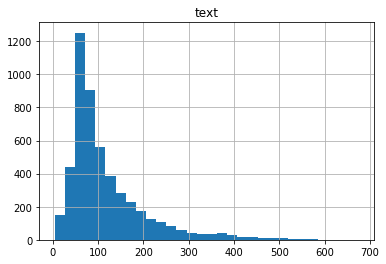

In [13]:
import matplotlib.pyplot as plt

text_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count})

length_df.hist(bins = 30)
plt.show()

In [14]:
max_text_len=200

In [15]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=200):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.8692


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 18550 to 15586
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          5000 non-null   object
 1   rating        5000 non-null   int64 
 2   cleaned_text  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 156.2+ KB


In [17]:
cleaned_text =np.array(data['cleaned_text'])
rating_before = np.array(data['rating'])

short_text=[]
rating = []
for i in range(len(cleaned_text)):
    if(len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        rating.append(rating_before[i])
        
df=pd.DataFrame({'text':short_text,'rating':rating})

In [18]:
print(df.head())

                                                                                                                                                                                                      text  \
0  one worst movies seen long time story acting shockingly bad dialog sounds like someone reading news rated comedy drama romance things little action really comedy drama went cinema see feel sorry w...   
1  young woman unwittingly becomes part kidnapping plot involving son movie producer babysitting kidnappers happen former business partners son father looking exact revenge babysitter must bide time ...   
2  years since gordon gekko used wall street let us know greed good michael douglas takes gg persona morphs secret service agent pete garrison guess works solid political thriller kept guessing detai...   
3  series random seemingly insignificant thefts sister boarding house miss lemon quite agitated ring light bulbs rucksack lighter stethoscope shoe seems rhyme reason miss lemon

In [19]:
def read_glove_vecs(glove_file):
    f = open(glove_file, encoding="utf-8", errors='ignore')
    words = set()
    word_to_vec_map = {}
        
    for line in f:
        line = line.strip().split()
        curr_word = line[0]
        words.add(curr_word)
        word_to_vec_map[curr_word] = np.asarray(line[1:], dtype=np.float64)
            
    return words, word_to_vec_map


In [20]:
words, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [21]:
w = list(word_to_vec_map.keys())
word_to_index = {}
for key,value in enumerate(w):
    word_to_index[value] = key
    
index_to_word = {}
for key, value in enumerate(w):
    index_to_word[key] = value

In [22]:
word_to_index['cucumber']

29794

In [23]:
maxLen = len(max(df['text'], key=len).split())
maxLen = 200

In [24]:
def sentences_to_indices(X, word_to_index, maxLen):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m, 1)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    m = X.shape[0]                                   # number of training examples
    
    ### START CODE HERE ###
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, maxLen))
    convert = X.values
    for i in range(m):                               # loop over training examples
        
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = convert[i].split()
        # Initialize j to 0
        j = 0
        
        #Loop over the words of sentence_words
        for w in sentence_words:
            # Set the (i,j)th entry of X_indices to the index of the correct word.
            if w not in word_to_index.keys():
                X_indices[i, j] = word_to_index['unk']
            else:
                X_indices[i, j] = word_to_index[w]
            # Increment j to j + 1
            j += 1
    ### END CODE HERE ###
    
    return X_indices

In [25]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    
    ### START CODE HERE ###
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    ### END CODE HERE ###

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [26]:
from tensorflow.keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
sentence_indices = Input(shape=(max_text_len,), dtype='int32')

#embedding layer
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
enc_emb =  embedding_layer(sentence_indices)   
#encoder lstm 1
encoder_lstm1_f = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm1_r = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4,go_backwards=True)## ##

encoder_bi1 = Bidirectional(encoder_lstm1_f, backward_layer=encoder_lstm1_r,)
encoder_output1, state_h1, state_c1, state_r_h1, state_r_h1 = encoder_bi1(enc_emb)

#encoder lstm 2
encoder_lstm2_r = LSTM(latent_dim,return_sequences=False,return_state=True,dropout=0.4,recurrent_dropout=0.4,go_backwards=True)##
encoder_lstm2_f = LSTM(latent_dim,return_sequences=False,return_state=True,dropout=0.4,recurrent_dropout=0.4)

encoder_bi2 = Bidirectional(encoder_lstm2_f, backward_layer=encoder_lstm2_r)
encoder_output2, state_h2, state_c2, state_r_h2, state_r_h2 = encoder_bi2(encoder_output1)


X = Dense(8)(encoder_output2)
# Add a softmax activation
X = Activation('softmax')(X)

# Define the model 
model = Model(inputs = sentence_indices, outputs = X)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 50)           20000050  
_________________________________________________________________
bidirectional (Bidirectional [(None, 200, 600), (None, 842400    
_________________________________________________________________
bidirectional_1 (Bidirection [(None, 600), (None, 300) 2162400   
_________________________________________________________________
dense (Dense)                (None, 8)                 4808      
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
Total params: 23,009,658
Trainable params: 3,009,608
Non-trainable params: 20,000,050
__________________________________

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [29]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['rating'].values
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_indices = encoder.fit_transform(y_train).toarray()
y_train_indices.shape

(4302, 8)

In [30]:
y_train_indices[0]

array([0., 0., 1., 0., 0., 0., 0., 0.])

In [31]:
model.fit(X_train_indices, y_train_indices, epochs = 5, callbacks=[es], batch_size = 65, shuffle=True)

Epoch 1/5
67/67 [==============================] - 3018s 45s/step - loss: 2.0363
Epoch 2/5
67/67 [==============================] - 4224s 63s/step - loss: 1.9126
Epoch 3/5
67/67 [==============================] - 4854s 72s/step - loss: 1.8738
Epoch 4/5
67/67 [==============================] - 5303s 79s/step - loss: 1.8434
Epoch 5/5
67/67 [==============================] - 5586s 83s/step - loss: 1.8142


In [38]:
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
y_test_indices = encoder.transform(y_test).toarray()
loss = model.evaluate(X_test_indices, y_test_indices)


2/2 [==============================] - 18s 9s/step - loss: 1.8764


In [42]:
pred = model.predict(X_test_indices)
print(pred)

[[0.5559388  0.16976665 0.06649095 0.07718341 0.0197537  0.02155652
  0.03107242 0.05823762]
 [0.6098227  0.1859893  0.07386318 0.0597468  0.01586052 0.01477927
  0.01187235 0.02806597]
 [0.0370956  0.00883074 0.02103702 0.00983977 0.10762917 0.18701491
  0.40993604 0.21861674]
 [0.47060266 0.22381692 0.07665522 0.1150685  0.03073544 0.02413154
  0.02183566 0.03715402]
 [0.67802423 0.17175888 0.0534675  0.047564   0.01251741 0.0112949
  0.00870264 0.01667054]
 [0.02700722 0.01075184 0.02702479 0.01291374 0.11306521 0.19699924
  0.29303563 0.31920233]
 [0.79472893 0.10561618 0.03303007 0.02847411 0.0072486  0.00833125
  0.00709363 0.0154772 ]
 [0.02793846 0.01276185 0.03018825 0.0231184  0.10480225 0.20231329
  0.37085626 0.2280213 ]
 [0.02110369 0.00719579 0.02230016 0.01886307 0.13567    0.24317107
  0.346021   0.20567523]
 [0.85719967 0.08310685 0.01930315 0.01541695 0.00416447 0.00479003
  0.0041357  0.01188315]
 [0.03260829 0.02143937 0.04457455 0.0455599  0.22971441 0.29144412
  0

In [49]:
print(y_test_indices)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 

In [53]:
from tensorflow.keras.metrics import categorical_accuracy
metric = categorical_accuracy(y_test_indices, pred)
print(metric.numpy())

[1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
